In [9]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import statsmodels.stats.proportion as proportion
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
Adm = pd.read_csv('https://docs.google.com/spreadsheets/d/1rOK0cjy3aEjScCZxu-JiUBf6pZL-sQDsigBonPkTRMY/export?format=csv')
Adm.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [11]:
Adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#Info shows there is no NULL values.

In [12]:
Adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
HighChan = Adm[(Adm['Chance of Admit'] >= 0.72 )]
LowChan = Adm[(Adm['Chance of Admit'] < 0.72 )] 

In [14]:
LowChan.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,252.699153,308.088983,102.940678,2.419492,2.762712,2.976695,8.121525,0.288136,0.601186
std,151.556908,8.068624,4.284147,0.897918,0.848558,0.809838,0.413391,0.453857,0.090386
min,5.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,109.000000,301.000000,100.000000,2.000000,2.000000,2.500000,7.880000,0.000000,0.540000
50%,265.000000,308.000000,103.000000,2.000000,2.500000,3.000000,8.125000,0.000000,0.620000
75%,388.250000,314.000000,106.000000,3.000000,3.500000,3.500000,8.450000,1.000000,0.670000
max,495.000000,327.000000,115.000000,5.000000,5.000000,5.000000,9.220000,1.000000,0.710000


In [15]:
HighChan.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,248.534091,323.965909,110.992424,3.734848,3.920455,3.937500,8.983106,0.803030,0.829508
std,138.110989,8.028631,4.802560,0.969966,0.764790,0.775624,0.435474,0.398465,0.076139
min,1.000000,303.000000,98.000000,1.000000,1.500000,1.500000,7.890000,0.000000,0.720000
25%,141.750000,319.000000,107.750000,3.000000,3.500000,3.500000,8.677500,1.000000,0.760000
50%,241.000000,324.000000,111.000000,4.000000,4.000000,4.000000,9.020000,1.000000,0.820000
75%,362.250000,329.000000,114.000000,5.000000,4.500000,4.500000,9.252500,1.000000,0.900000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


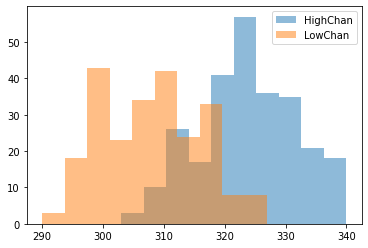

In [16]:
plt.hist(HighChan['GRE Score'], alpha = .5, label = "HighChan")
plt.hist(LowChan['GRE Score'], alpha = .5, label = "LowChan")
plt.legend(loc="upper right")
plt.show()

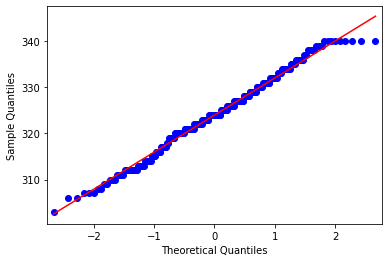

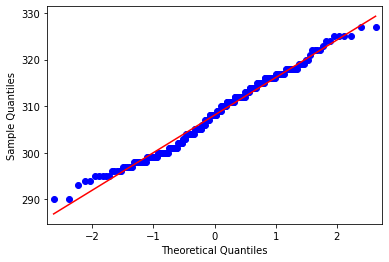

In [17]:
sm.qqplot(HighChan['GRE Score'], line = 's')
plt.show()
sm.qqplot(LowChan['GRE Score'], line = 's')
plt.show()

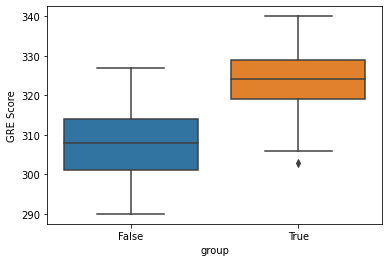

In [18]:
Adm['group'] = Adm['Chance of Admit'] >= 0.72
sns.boxplot( x='group',
    y='GRE Score',
    data=Adm,
    )

[[Text(0, 0, 'HighChan'), Text(0, 0, 'LowChan')]]

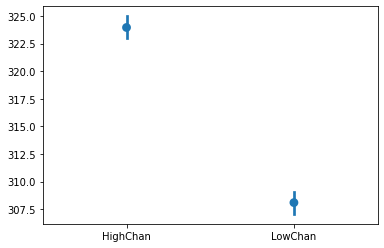

In [19]:
g = sns.pointplot(data=[HighChan['GRE Score'], LowChan['GRE Score']], join=False)
                        
g.set(xticklabels = ['HighChan', 'LowChan'])

T-TEST

In [20]:
t, p = stats.ttest_ind(HighChan['GRE Score'], LowChan['GRE Score'])
p


1.4737323571414602e-75

# We reject the NULL hypothesis because P_Value is very smal(<0.05) SO we will reject that the average GRE Score with high chance of admission is equal to average GRE Score with low chance of admission


In [21]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(HighChan['GRE Score'], LowChan['GRE Score'])

'The difference in means at the 95% confidence interval (two-tail) is between -17.290331191906667 and -14.463520888216573.'

The average GRE Score for those with higher chance of admission is approximately(with 95% confidence) 14 to 17 Score more than the GRE Score who have less chance of admission.

In [23]:
t, p = stats.ttest_ind(HighChan['TOEFL Score'], LowChan['TOEFL Score'])
p


3.0082116749464657e-64

# We reject the NULL hypothesis because P_Value is very smal(<0.05) SO we will reject that the average TOEFL Score with high chance of admission is equal to average TOEFL Score with low chance of admission

In [22]:
get_95_ci(HighChan['TOEFL Score'], LowChan['TOEFL Score'])

'The difference in means at the 95% confidence interval (two-tail) is between -8.848231663289694 and -7.255260889355428.'

The average TOEFL Score for those with higher chance of admission is approximately(with 95% confidence) 7.3 to 8.8 Score more than the TOEFL Score who have less chance of admission.


#At the end, we recommand all volunteers who seeking to get admission for american universities allocate enogh time for GRE and TOEFL exam because according to this study, these two criteria is very important to have high chance of admission. 